<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 117.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 175.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 171.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 164.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2026-02-13 04:19:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.1MB/s    in 3.3s    

2026-02-13 04:19:21 (46.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


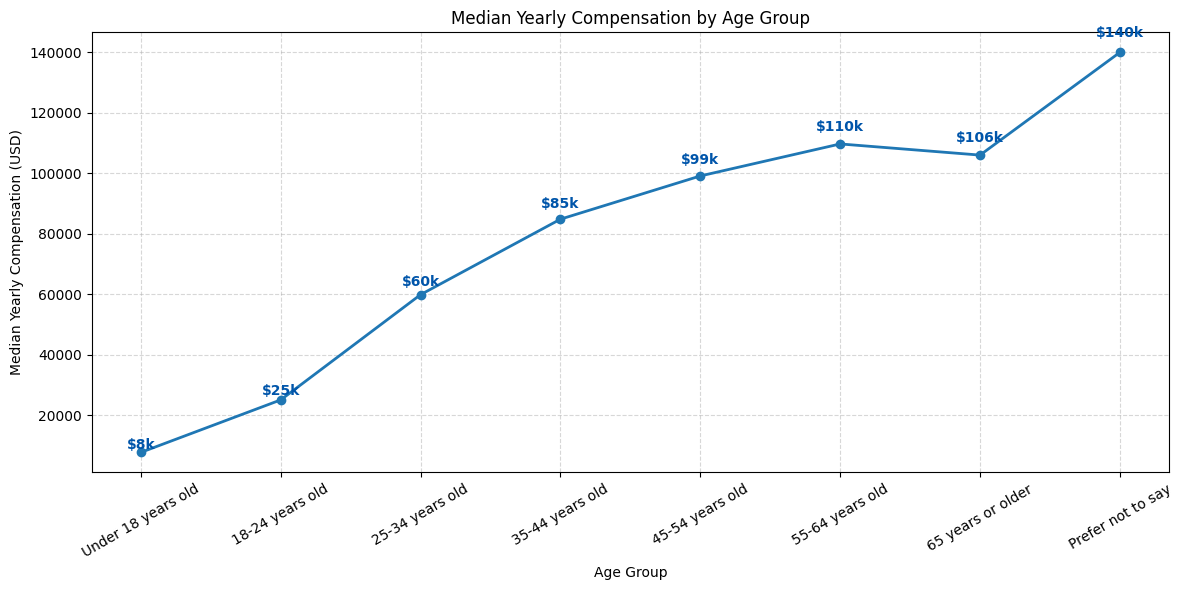

In [23]:
# Step 1: Select relevant columns
cols = ['Age', 'ConvertedCompYearly']
df_comp = df[cols].dropna()

# Step 2: Convert compensation to numeric
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')
df_comp = df_comp.dropna(subset=['ConvertedCompYearly'])

# Step 3: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_comp['Age'] = pd.Categorical(df_comp['Age'], categories=age_order, ordered=True)

# Step 4: Compute median compensation by age group
median_comp = df_comp.groupby('Age', observed=True)['ConvertedCompYearly'].median()

# Step 5: Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-', linewidth=2)

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Adding labels to data points for clarity
for x, y in zip(median_comp.index, median_comp.values):
    plt.text(
        x, 
        y + (y * 0.03),     # Offset slightly above the point
        f'${y/1000:.0f}k', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold', 
        color='#0055aa'     # Added quotes around the hex code
    )

plt.tight_layout()

plt.show()


##### Summary Interpretation

`Overall Trend`
Compensation follows a classic career earnings curve:
Low in youth
Rapid growth in early career
Peak in mid‑to‑late career
Slight decline in later years
>The chart clearly shows that experience and age correlate strongly with higher compensation, with the exception of the “Prefer not to say” group, which behaves as an outlier.

Summary:
The compensation pattern across age groups shows a steady and intuitive rise as respondents progress through their careers, with earnings increasing sharply from early adulthood into mid‑career as individuals gain experience, stability, and specialized skills. Median income continues to climb through the 45–54 and 55–64 groups, reflecting peak professional maturity. Notably, the 65+ group shows an additional jump rather than a decline, suggesting that those who remain active in the workforce beyond traditional retirement age often occupy highly compensated roles—such as consulting, executive leadership, or niche expert positions—where deep experience commands a premium. The “Prefer not to say” category reports the highest median overall, likely influenced by a small subset of high‑earning respondents who choose not to disclose their age. Overall, the trend underscores a strong relationship between age, experience, and earning power, with compensation rising consistently across most of the working lifespan.

In [24]:
# # absimport pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Select relevant columns and drop missing values
# comp_age = df[['Age', 'ConvertedCompYearly']].dropna()

# # 2. Define the correct chronological order for Age Groups
# age_order = [
#     'Under 18 years old',
#     '18-24 years old',
#     '25-34 years old',
#     '35-44 years old',
#     '45-54 years old',
#     '55-64 years old',
#     '65 years or older',
#     'Prefer not to say'
# ]

# comp_age = comp_age[comp_age['Age'].isin(age_order)]
# # 3. Convert Age to an ordered categorical type
# comp_age['Age'] = pd.Categorical(comp_age['Age'], categories=age_order, ordered=True)

# # 4. Group by Age and calculate Median Compensation
# age_trends = comp_age.groupby('Age', observed=True)['ConvertedCompYearly'].median()

# # 5. Plotting the Line Chart
# plt.figure(figsize=(12, 6))
# plt.plot(age_trends.index, age_trends.values, marker='o', linestyle='-', color='#2c3e50', linewidth=2)

# # 6. Styling
# plt.title('Trend of Median Yearly Compensation by Age Group', fontsize=14, pad=15)
# plt.xlabel('Age Group', fontsize=12)
# plt.ylabel('Median Compensation (USD)', fontsize=12)
# plt.xticks(rotation=30)
# plt.grid(True, linestyle='--', alpha=0.6)

# # Optional: Adding labels to data points for clarity
# for x, y in zip(age_trends.index, age_trends.values):
#     plt.text(x, y + (y * 0.02), f'${y/1000:.0f}k', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#0055aa')

# plt.tight_layout()
# plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


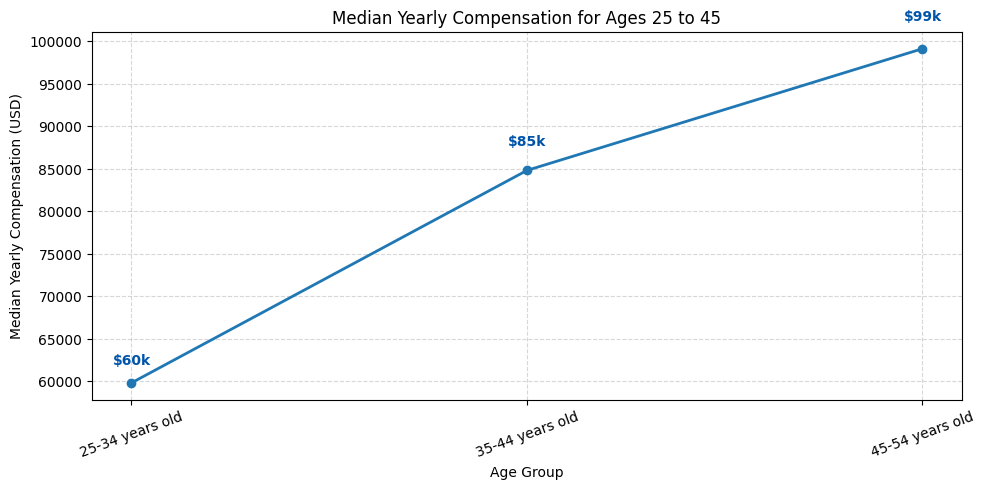

In [29]:
# Step 1: Select relevant columns
cols = ['Age', 'ConvertedCompYearly']
df_comp = df[cols].dropna()

# Step 2: Convert compensation to numeric
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')
df_comp = df_comp.dropna(subset=['ConvertedCompYearly'])

# Step 3: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_comp['Age'] = pd.Categorical(df_comp['Age'], categories=age_order, ordered=True)

# Step 4: Filter for ages 25 to 45
age_focus = ['25-34 years old', '35-44 years old', '45-54 years old']
df_focus = df_comp[df_comp['Age'].isin(age_focus)]

# Step 5: Compute median compensation for the selected age groups
median_focus = df_focus.groupby('Age', observed=True)['ConvertedCompYearly'].median()

# Step 6: Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(median_focus.index, median_focus.values, marker='o', linestyle='-', linewidth=2)

plt.title('Median Yearly Compensation for Ages 25 to 45')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=20)
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Add labels above points
for x, y in zip(median_focus.index, median_focus.values):
    plt.text(
        x,
        y + (y * 0.03),
        f'${y/1000:.0f}k',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='#0055aa'
    )

# # Adding Accessible Blue Data Labels
# for x, y in zip(median_focus.index, median_focus.values):
#     plt.annotate(
#         f'${y/1000:.1f}k', 
#         (x, y), 
#         textcoords="offset points", 
#         xytext=(0, 12), 
#         ha='center', 
#         color='#0055aa', 
#         fontweight='bold'
#     )

plt.tight_layout()
plt.show()


##### Interpretation of Median Compensation for Ages 25 to 45

Focusing on the core working‑age range reveals a clear and steady upward trajectory in median yearly compensation. Respondents aged 25–34 report a median of `$60k`, reflecting early‑career growth as individuals transition into stable roles and begin accumulating specialized skills. Compensation rises sharply in the 35–44 group to `$85k`, marking the period where experience, professional maturity, and career advancement converge. The trend continues upward into the 45–54 group, reaching $99k, which aligns with peak earning years when many professionals hold senior, managerial, or expert‑level positions. This focused view highlights a consistent pattern of increasing earning power across the prime working decades, reinforcing the strong relationship between experience and compensation within this age window.

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


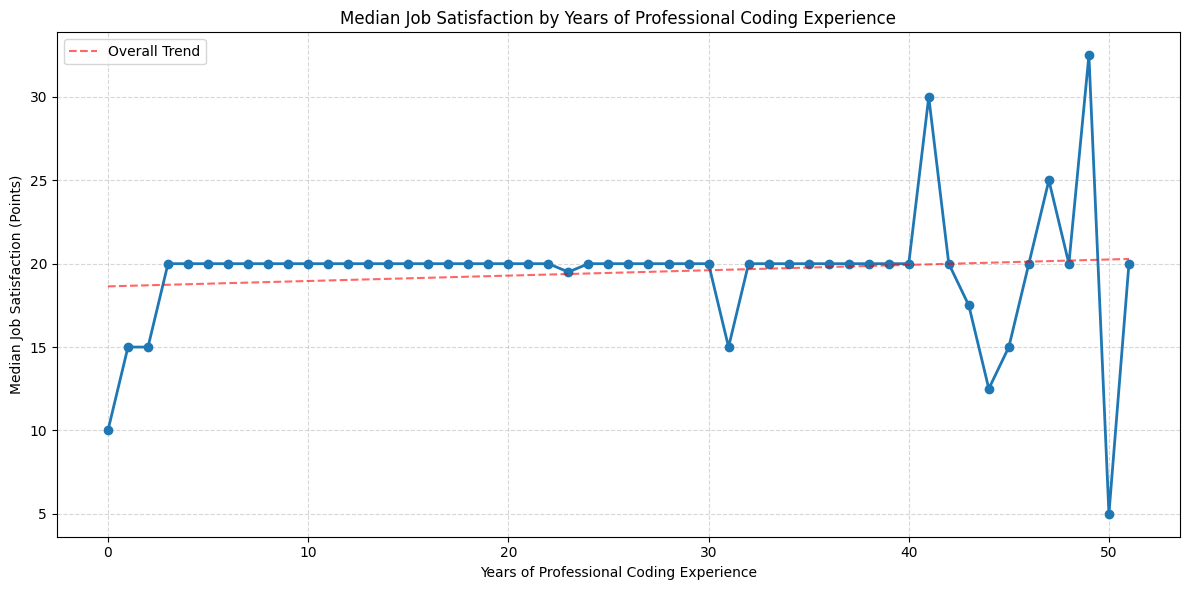

In [39]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['YearsCodePro', 'JobSatPoints_6']
df_sat = df[cols].dropna()

# Step 2: Convert YearsCodePro to numeric
df_sat['YearsCodePro'] = pd.to_numeric(df_sat['YearsCodePro'], errors='coerce')
df_sat = df_sat.dropna(subset=['YearsCodePro'])

# Step 3: Convert JobSatPoints_6 to numeric
df_sat['JobSatPoints_6'] = pd.to_numeric(df_sat['JobSatPoints_6'], errors='coerce')
df_sat = df_sat.dropna(subset=['JobSatPoints_6'])

# Step 4: Group by experience level and compute median job satisfaction
median_sat = df_sat.groupby('YearsCodePro', observed=True)['JobSatPoints_6'].median()

# Step 5: Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(median_sat.index, median_sat.values, marker='o', linestyle='-', linewidth=2)

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a trendline (Optional but helpful for seeing the long-term pattern)
import numpy as np
z = np.polyfit(median_sat.index, median_sat.values, 1)
p = np.poly1d(z)
plt.plot(median_sat.index, p(median_sat.index), "r--", alpha=0.6, label='Overall Trend')

plt.legend()

plt.tight_layout()
plt.show()


`Summary Interpretation`: Job Satisfaction by Years of Professional Coding Experience

The relationship between experience and job satisfaction follows a generally positive trajectory, with satisfaction rising steadily through the early and mid stages of a developer’s career. In the first several years of professional coding, median satisfaction increases as individuals gain confidence, autonomy, and familiarity with their tools and workflows. This upward movement stabilizes around the mid‑career range, where satisfaction levels remain consistently high, suggesting that experience brings a sense of mastery and alignment with one’s role.

Beyond roughly 30–40 years of experience, the pattern becomes more irregular, with noticeable peaks and dips. These fluctuations likely reflect the small number of respondents in these extreme experience ranges, where individual variation has a stronger influence on the median. Despite this noise, the overall trendline reinforces a clear long‑term pattern: job satisfaction tends to improve with experience and remains relatively strong throughout a developer’s career.

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


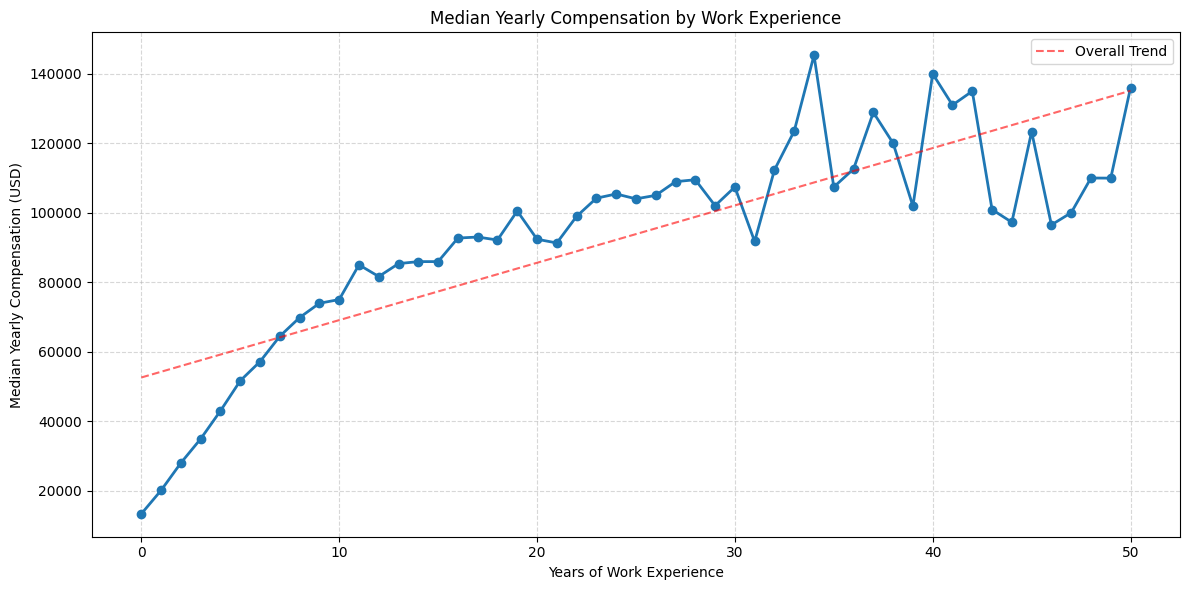

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['WorkExp', 'ConvertedCompYearly']
df_exp = df[cols].dropna()

# Step 2: Convert WorkExp to numeric
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')
df_exp = df_exp.dropna(subset=['WorkExp'])

# Step 3: Convert compensation to numeric
df_exp['ConvertedCompYearly'] = pd.to_numeric(df_exp['ConvertedCompYearly'], errors='coerce')
df_exp = df_exp.dropna(subset=['ConvertedCompYearly'])

# Step 4: Compute median compensation by experience level
median_comp_exp = df_exp.groupby('WorkExp', observed=True)['ConvertedCompYearly'].median()

# Step 5: Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(median_comp_exp.index, median_comp_exp.values, marker='o', linestyle='-', linewidth=2)

plt.title('Median Yearly Compensation by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Trendline
import numpy as np
z = np.polyfit(median_comp_exp.index, median_comp_exp.values, 1)
p = np.poly1d(z)
plt.plot(median_comp_exp.index, p(median_comp_exp.index), "r--", alpha=0.6, label='Overall Trend')

plt.legend()
plt.tight_layout()
plt.show()


`Summary Interpretation`: Median Compensation by Work Experience

The compensation pattern across years of work experience shows a clear long‑term upward trajectory, with earnings rising steadily as individuals accumulate professional expertise. Early‑career compensation begins at modest levels, but increases quickly through the first decade of experience as workers gain stability, technical depth, and access to higher‑value roles. Mid‑career professionals continue to see strong growth, reflecting advancement into senior, specialized, or leadership positions. Beyond roughly 30 years of experience, the data becomes more irregular, with noticeable peaks and dips that likely stem from smaller sample sizes in these extreme experience ranges. Despite this variability, the overall trendline reinforces a consistent message: compensation generally increases with experience, and the long‑term earning potential continues to strengthen across most of the working lifespan.

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


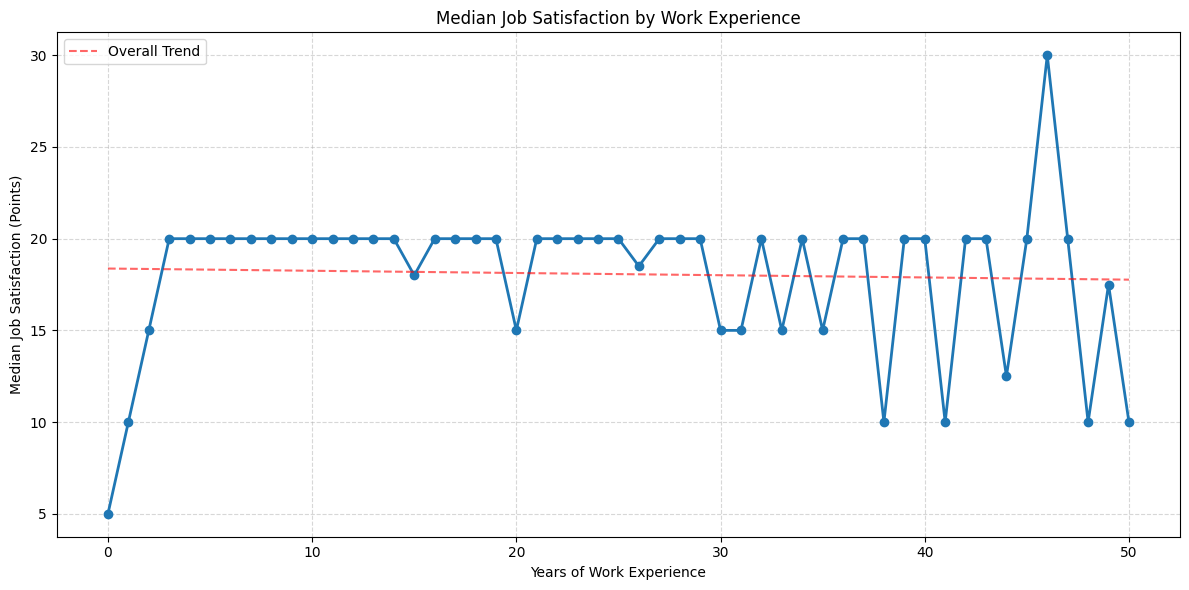

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['WorkExp', 'JobSatPoints_6']
df_js = df[cols].dropna()

# Step 2: Convert WorkExp to numeric
df_js['WorkExp'] = pd.to_numeric(df_js['WorkExp'], errors='coerce')
df_js = df_js.dropna(subset=['WorkExp'])

# Step 3: Convert JobSatPoints_6 to numeric
df_js['JobSatPoints_6'] = pd.to_numeric(df_js['JobSatPoints_6'], errors='coerce')
df_js = df_js.dropna(subset=['JobSatPoints_6'])

# Step 4: Compute median job satisfaction by experience level
median_js = df_js.groupby('WorkExp', observed=True)['JobSatPoints_6'].median()

# Step 5: Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(median_js.index, median_js.values, marker='o', linestyle='-', linewidth=2)

plt.title('Median Job Satisfaction by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Add a trendline
import numpy as np
z = np.polyfit(median_js.index, median_js.values, 1)
p = np.poly1d(z)
plt.plot(median_js.index, p(median_js.index), "r--", alpha=0.6, label='Overall Trend')

plt.legend()
plt.tight_layout()
plt.show()


`Summary Interpretation`: Job Satisfaction Across Work Experience

Job satisfaction rises quickly in the early stages of a career, reflecting the boost that comes with gaining confidence, skill, and stability in professional roles. After this initial climb, satisfaction levels settle into a long, steady plateau, suggesting that most mid‑career professionals maintain a consistent sense of fulfillment once they reach a stable rhythm in their work. In the later decades of experience, the pattern becomes more uneven, with noticeable peaks and dips that likely stem from smaller sample sizes and diverse career paths among highly experienced respondents. Despite this variability, the overall trendline reinforces a clear message: job satisfaction generally improves with experience and remains relatively strong throughout the majority of the working lifespan.

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
